In [14]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [15]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        margin:auto;
    }
.output_table {text-align: center;}
.prompt{
    display:none;
}
</style>
""")

<h1><center>Party Donation Study in Washington State</center></h1>

<h2>Introduction</h2>

<p><font size="3">Donation to the election has always been a good topic in American people's life. This study tagets the donations happened in the Washington State.</font></p>

<p><font size="3">The dataset this study using is a historical donation data around the Washington State area from 2001 to 2017. It consists of several attributes of all the donation through these years. Please see the table below as a demo of variables of interest in this study.</font></p>

In [16]:
#Import and read data from github
import pandas as pd
link='https://raw.githubusercontent.com/maomaohenmao/data/master/small_donations_data.csv'
donor = pd.read_csv(link)#Import and read data from github
#convert the type of several variables of interests (from object to category or ordinal category)
donor['contributor_city']= donor['contributor_city'].astype('category')
donor['party']= donor['party'].astype('category')
donor['primary_general']=donor['primary_general'].astype('category')
donor['type']= donor['type'].astype('category')
# select the variables of interests
donorsmall= donor[['contributor_state','contributor_zip','amount','contributor_city','party','type','primary_general']]
#take a look at the columns of new dataset
donorsmall.head()

,contributor_state,contributor_zip,amount,contributor_city,party,type,primary_general
0,WA,98584,20.00,SHELTON,REPUBLICAN,Candidate,Primary
1,WA,98225,1000.00,BELLINGHAM,DEMOCRAT,Candidate,General
2,WA,99336,30.00,KENNEWICK,NaN,Political Committee,Full election cycle
3,WA,98121,50.00,SEATTLE,NaN,Political Committee,Full election cycle
4,WA,98391,164.17,BONNEY LAKE,DEMOCRAT,Candidate,Primary


<p><font size="3">The main variable in the study of interest is the amount of each donation, most of the analysis are based on this variable. The variable "party" indicates that which party get this donation. The variable "type" indicates that what type of donation it is. (to the candidate or to the political committee) The variable "primary_general" shows that which round of election this donation goes. I also include the contributor zipcode in order to make a map to show the geographic pattern.</font></p>

<h2>Descriptive Analysis</h2>

<h3>1. Donation Amount</h3>

In [17]:
#descriptive statistics of column 'amount'
donorsmall['amount'].describe()
#donorsmall['amount'].kurt()
#donorsmall['amount'].skew()

count      9491.000000
mean        255.749095
std        2957.761253
min           0.000000
25%          10.000000
50%          35.000000
75%         100.000000
max      122649.590000
Name: amount, dtype: float64

<p><font size="3">As we can see in the table above, there are total 9491 donations in my dataset happened trough 2001-2017 in Washington State. The median of all the donation is 35 dollars. 75 penrcent of the donation are below 100 dollars. However, the largest amount is 122649.59 dollars. Due to the big variation, the standard deviation is really huge. (about 3000 dollars)</font></p>

<p><font size="3">The plot below shows how the donation amount is shaped. We can see that it is very skew to the left. It is nearly shaped as half of the Normal distribution. Most of the donation are arount 0 to 100 dollars (more than 75%). But there are several big amount donations make the graph looks weird. It has a long tail to the right due to those outliers. The skewness of the donation amount is 28.83 and the kurtness is 937.08.</font></p>

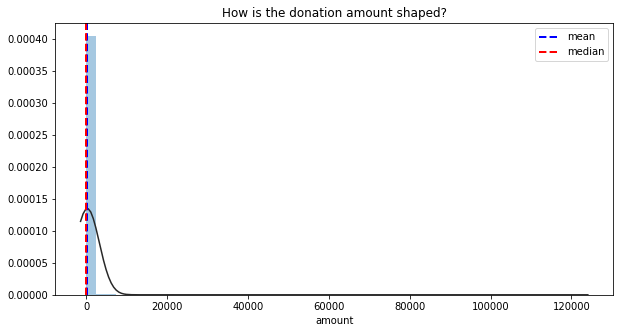

In [41]:
# a simple plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mnVar=donorsmall['amount'].mean()
mdVar=donorsmall['amount'].median()
plt.figure(figsize=(10,5))
sns.distplot(donorsmall['amount'].dropna(),kde=False,fit=norm)
plt.title('How is the donation amount shaped?')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

<h3>2. Contributor City</h3>

<p><font size="3">As we can see in the table below, the 9491 donations are from 718 different cities, in which Seattle coutributes the most, with  1790 times donations during these years. It is probably because Seattle has more population so most of the fundraising event are set up in Seattle.</font></p>

In [19]:
donorsmall['contributor_city'].describe()

count        9491
unique        718
top       SEATTLE
freq         1790
Name: contributor_city, dtype: object

<h3>3. Election Round</h3>

<p><font size="3">The table below shows the distribution of the type of the donation. 6248 donations are for the full election cycle. 1985 donations are only for Primary election and 1258 donations are only for General election.</font></p>

In [20]:
#descriptive statistics of column 'primary_general'
donorsmall['primary_general'].value_counts()

Full election cycle    6248
Primary                1985
General                1258
Name: primary_general, dtype: int64

<p><font size="3"> We can also see that the Primary election has more times of donations than General election. But overall, most cotributors donate their money to the full election cycle. It could be that people feel more involved in the Primary election round since they can have more inperson connection with the candidates.Please see the plot below:</font></p>

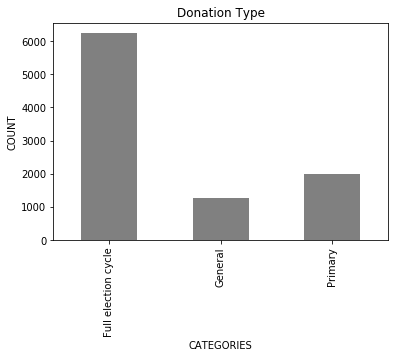

In [21]:
# a simple plot
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorsmall['primary_general'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Type")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

<h3>4. Party</h3>

<p><font size="3">The table below shows the distribution of the party of the donation in the dataset. Democrat gets 1366 times donation. Republican gets 1148 times donation, and Non-Partisan gets 1090 times donation. Please see the plot below:</font></p>

In [25]:
#drop the rows whose party is 'none'
byeCategories=['NONE']
donorDRI=donorsmall[~donorsmall.party.isin(byeCategories)].copy()
donorDRI['party'].value_counts()

DEMOCRAT        1366
REPUBLICAN      1148
NON PARTISAN    1090
OTHER             38
INDEPENDENT        3
NONE               0
Name: party, dtype: int64

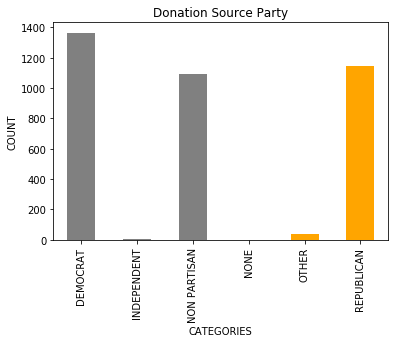

In [26]:
#a simple plot
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorDRI['party'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Source Party")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

<p><font size="3">The table below shows a pivot table of party and donation type. Except donations to Independent and Other, the count of donation to General election are the most, which could means that people feels that General election is more important than the Primary round for the two big partys. Remeber, data shows that the Primary round get more number of donations, we can see here that the Primary round donation to "Other Party" contributes a lot. It is probably because these parties might not able to get into the General round election, so all its fund come to the Primary round.</font></p>

In [27]:
#a pivot table of party and primay_general
pd.pivot_table(donorDRI, values='amount',index='primary_general',columns='party', aggfunc='mean')

party,DEMOCRAT,INDEPENDENT,NON PARTISAN,OTHER,REPUBLICAN
primary_general,,,,,
Full election cycle,111.891500,108.5,170.656211,54.266667,149.010714
General,269.072911,NaN,207.928530,183.000000,362.629145
Primary,210.884613,250.0,192.544473,1785.769231,224.178698


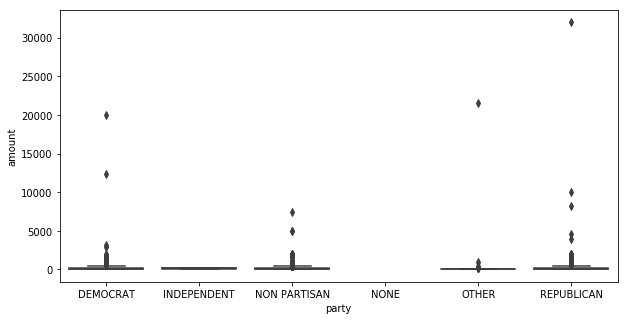

In [42]:
#a box plot to find outliers of the donation of different party
plt.figure(figsize=(10,5))
sns.boxplot(x="party", y="amount", data=donorDRI)

<p><font size="3">Also, plot above shows that how the donation distributed for different Party. In general, most of the donation amount are around 100 dollars. However, Democrat and Republican also got considerable times of huge donations which are outliers in the dataset.</font></p>

<h2>Statistical Analysis</h2>

<p><font size="3">Since we figure out that we have prominent outliers, we should use Robuset linear Model Regression.</font></p>

In [30]:
#drop na in donorDRI for further preparation
donorDRI.dropna(inplace=True)
#since we figure out that we have prominent outliers,  we should use Robuset linear Model Regression
#regress amount with party, type and primary_general
#with the base as independent party, political committee type and primary use
from statsmodels.robust.robust_linear_model import RLM

formula='amount ~ C(party, Treatment("INDEPENDENT"))+ C(type, Treatment("Political Committee"))+ C(primary_general, Treatment("Primary"))'
LinRegR_catX = RLM.from_formula(formula, donorDRI).fit()
print(LinRegR_catX.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 amount   No. Observations:                 3645
Model:                            RLM   Df Residuals:                     3638
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 06 Mar 2018                                         
Time:                        13:07:12                                         
No. Iterations:                    50                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

<p><font size="3">From the regression result, we can see that there is no statistical significant difference between the donation amount of different parties, which is suprising since Washington State is a loyal voter for Democrat. Also, there is no statistical significant difference between the donation amount to Political Committee and the Candidate. However, compared to the donation amount to Primary election, there is more money donated to General election , which could means that people feel more involved in the General election than the Primary election. A simpler result is shown below:</font></p>

In [31]:
#a simpler result of the regression
pd.concat({'Coefficients':LinRegR_catX.params,
           'Significant?':LinRegR_catX.pvalues<0.05},axis=1)

,Coefficients,Significant?
Intercept,-5.603382e+14,False
"C(party, Treatment(""INDEPENDENT""))[T.DEMOCRAT]",-5.277148e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.NON PARTISAN]",-4.431165e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.NONE]",-7.123650e+10,False
"C(party, Treatment(""INDEPENDENT""))[T.OTHER]",-6.749830e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.REPUBLICAN]",-4.800437e+01,False
"C(type, Treatment(""Political Committee""))[T.Candidate]",5.603382e+14,False
"C(primary_general, Treatment(""Primary""))[T.Full election cycle]",-2.380214e+01,True
"C(primary_general, Treatment(""Primary""))[T.General]",1.823777e+01,True


<h2>Geographical Analysis</h2>

<p><font size="3">The table below shows all the donation happened in Washington State. We will use Geographical analysis to figure out which area in WA these donations come from. The area catergory I am using is Zipcode.</font></p>

In [33]:
#create the link of map of use
compressedMap= 'https://github.com/maomaohenmao/data/raw/master/WAmap.zip'
#read the map as .zip file
import geopandas as gpd
wazipMap = gpd.GeoDataFrame.from_file(compressedMap)
#convert data type of the 
wazipMap.ZCTA5CE10=wazipMap.ZCTA5CE10.astype(int)
#have only the donation from WA
donorNEW=donorDRI[donorDRI['contributor_state'] == 'WA']
donorNEW.head()

,contributor_state,contributor_zip,amount,contributor_city,party,type,primary_general
0,WA,98584,20.00,SHELTON,REPUBLICAN,Candidate,Primary
1,WA,98225,1000.00,BELLINGHAM,DEMOCRAT,Candidate,General
4,WA,98391,164.17,BONNEY LAKE,DEMOCRAT,Candidate,Primary
7,WA,99208,5.00,SPOKANE,DEMOCRAT,Candidate,Primary
8,WA,98296,50.00,SNOHOMISH,DEMOCRAT,Candidate,General


<p><font size="3">In the map below, all areas in Pink are the area donated money to the election. All areas in Black are the area didn't donate money to the election.(Or not covered in the dataset I am using)</font></p>

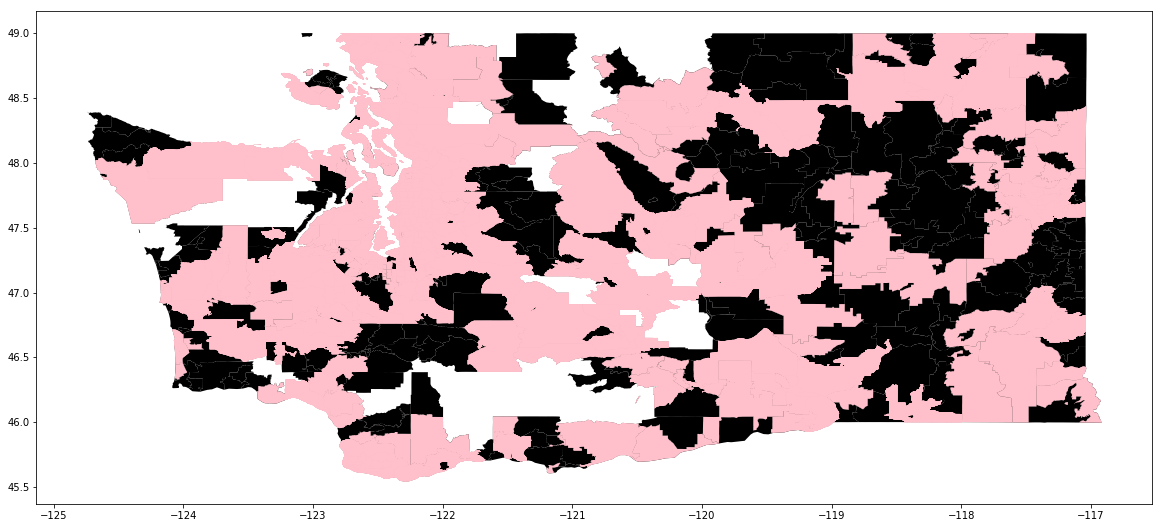

In [34]:
#merge data based on zipcode
contribWAmap=wazipMap.merge(donorNEW, left_on='ZCTA5CE10', right_on='contributor_zip')
#draw a map to check the area that have no donation
%matplotlib inline
base = wazipMap.plot(color='black',figsize=(20,13))

contribWAmap.plot(ax=base, color='pink')

<p><font size="3">The map below shows that the contribution amount in different Zipcode area, where gray areas are the missdata in my dataset, deep blue areas are the areas that contribute most donation aount to the eletions.</font></p>

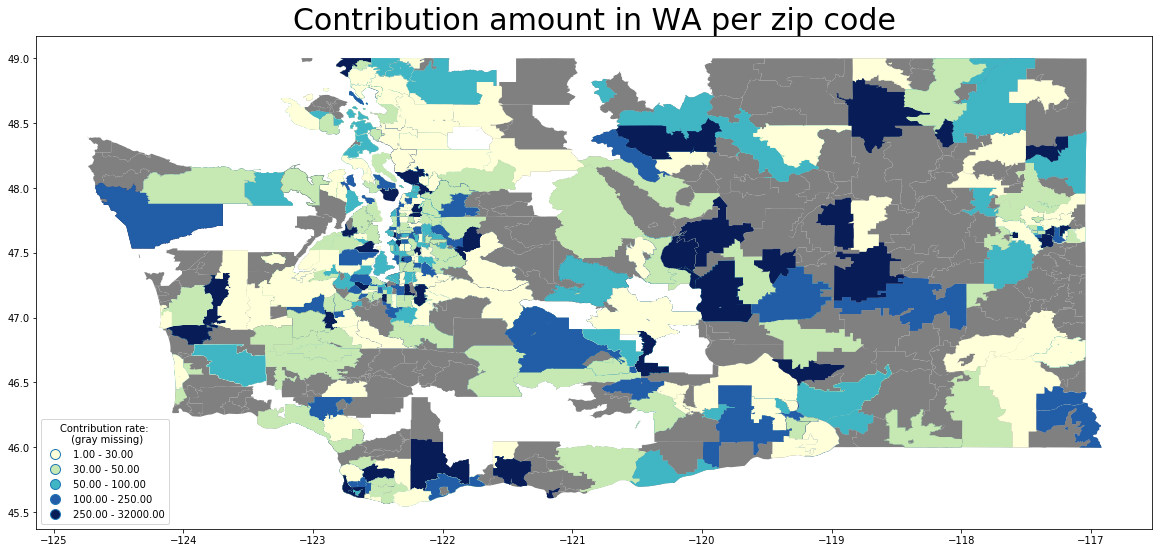

In [39]:
#a plot of the different contribution rate of different regions
import matplotlib.pyplot as plt

base = wazipMap.plot(color='gray',figsize=(20,13))

topLayer=contribWAmap.plot(ax=base,column='amount',cmap='YlGnBu',scheme='Quantiles',k=5,legend=True,
                  legend_kwds={'loc': 3,'title':'Contribution rate: \n (gray missing)'})
topLayer.set_title('Contribution amount in WA per zip code', 
                   color='black',fontdict={'fontsize':30})
leg = topLayer.get_legend()
plt.setp(leg.get_title(), multialignment='center')
plt.show()
#to save the map using:
#contribWAmap.to_file(driver = 'ESRI Shapefile', filename= "contribWAmap.shp")